Testing Playground

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pickle
import numpy as np
from matplotlib import pyplot as plt
from universal_portfolio import universal_portfolio
from ftl import ftl
from ftrl import ftrl

In [28]:
# intialization
dict = pickle.load(open('../data/stock_data.pickle', 'rb'))
stock_tickers = ['GOOGL', 'NKE', 'AAPL', 'C', 'GS', 'QCOM', 'FB', 'TSLA', 'DD', 'NFLX']
n = len(stock_tickers)
data = []
prev_price = [dict[i]['price'][0] for i in stock_tickers]
for j in range(len(dict['GOOGL']['price'])):
    curr_time_step = []
    for i in range(n):
        stock = stock_tickers[i]
        curr_time_step.append(dict[stock]['price'][j] / prev_price[i])
        prev_price[i] = dict[stock]['price'][j]
    data.append(curr_time_step)
data = np.array(data)
# data = np.array([[2,0.5],[0.5,2],[2,0.5],[0.5,2],[2,0.5],[0.5,2]])
up = universal_portfolio(n)
follow_leader = ftl(n)
follow_regularized = ftrl(n, 10)

In [30]:
up_performance = up.ingest(data)
ftl_performance = follow_leader.ingest(data)
ftrl_performance = follow_regularized.ingest(data)

In [31]:
print(str(up_performance) + '\n')
print(str(ftl_performance) + '\n')
print(str(ftrl_performance) + '\n')

wealth growth: [1, 0.9999999999999999, 1.0101645165850153, 0.9989689227559825, 1.0091426600492788, 1.0064878518124436, 1.0350286410436254, 1.0524318351611504, 1.0539003137918428, 1.055235320074296, 1.0597786653098362, 1.0708697313380795, 1.0487033719325916, 1.0684134334314994, 1.0675150171223848, 1.0505763511581776, 1.0560799655881448, 1.0891281048019232, 1.1023736885749853, 1.1165309193969282, 1.0991036623940802, 1.1242895854801873, 1.1347688063168118, 1.1376427440932584, 1.1249985945209562, 1.1414540600353766, 1.1354447482810046, 1.1260287786065613, 1.160468032405887, 1.1787760520336747, 1.178784408622618, 1.191348441127902, 1.1744844470503528, 1.1744844470503482, 1.18654043844705, 1.1735923594715587, 1.1860119790576453, 1.183019109745171, 1.216553327388156, 1.2369537417912015, 1.2387472201756746, 1.2401743598908033, 1.2453946847972872, 1.258522832095507, 1.2325820262032248, 1.255878865505897, 1.254861755972305, 1.2350915769406536, 1.2415210755845745, 1.2805442338814386, 1.2960417884

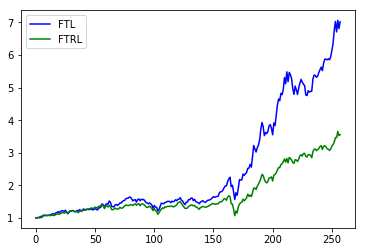

In [38]:
# graphing
x = [i for i in range(len(data) + 1)]
plt.plot([i for i in range(up_performance.wealth)], up_performance.wealth, 'r', label='UP')
plt.plot(x, ftl_performance.wealth, 'b', label='FTL')
plt.plot(x, ftrl_performance.wealth, 'g', label='FTRL')
plt.legend(loc='upper left')
plt.show()
